In [58]:
import numpy as np
from matplotlib import pyplot as plot

In [68]:
QPSKDictionary = {"11" : complex(1, 1) / np.sqrt(2),
                 "10" : complex(1, -1) / np.sqrt(2),
                 "01" : complex(-1, 1) / np.sqrt(2),
                 "00" : complex(-1, -1) / np.sqrt(2)}

QAMDictionary = {"0000" : complex(1, 1) / np.sqrt(5),
                "0001" : complex(3, 1) / np.sqrt(5),
                "0010" : complex(1, 3) / np.sqrt(5),
                "0011" : complex(3, 3) / np.sqrt(5),
                "0100" : complex(1, -1) / np.sqrt(5),
                "0101" : complex(1, -3) / np.sqrt(5),
                "0110" : complex(3, -1) / np.sqrt(5),
                "0111" : complex(3, -3) / np.sqrt(5),
                "1000" : complex(-1, 1) / np.sqrt(5),
                "1001" : complex(-1, 3) / np.sqrt(5),
                "1010" : complex(-3, 1) / np.sqrt(5),
                "1011" : complex(-3, 3) / np.sqrt(5),
                "1100" : complex(-1, -1) / np.sqrt(5),
                "1101" : complex(-3, -1) / np.sqrt(5),
                "1110" : complex(-1, -3) / np.sqrt(5),
                "1111" : complex(-3, -3) / np.sqrt(5)}

def generateDataStream(numberOfBitsBlocks, numberOfBits) :
    dataStream = list()
    for i in range(numberOfBitsBlocks) :
        dataStream.append("".join([str(x) for x in np.random.randint(low = 0, high = 2, size = numberOfBits)]))
    return np.array(dataStream)

def PAMMapping(dataStream, PAMDictionary) :
    transmitterStream = list()

    for data in dataStream :
        transmitterStream.append(PAMDictionary[data])
    return np.array(transmitterStream)

def findDistance(z1, z2) :
        return np.sqrt((z1.real-z2.real) ** 2 + (z1.imag-z2.imag) ** 2)
               
def maximumLikelihood(data, PAMDictionary) :
        minDistance = 2 ** 32
        for key in PAMDictionary :
            distance = findDistance(data, PAMDictionary[key])
            if distance < minDistance :
                minDistance = distance
                correspondingValue = key

        return correspondingValue
    
def PAMDemapping(dataStream, PAMDictionary) :
        receiverStream = list()
        for data in dataStream :
            receiverStream.append(maximumLikelihood(data, PAMDictionary))
        return np.array(receiverStream)

def fastFading(dataStream, modulationPower) :
    ffData = list()
    channelEffect = list()
    for i in range(len(dataStream)) :
        h = complex(np.random.normal(0, 1), np.random.normal(0, 1)) / modulationPower
        ffData.append(dataStream[i]*h)
        channelEffect.append(h)
    return np.array(ffData), np.array(channelEffect)

def AWGN(dataStream, sigma, modulationPower) :
    AWGNData = list()
    for i in range(len(dataStream)) :
        n = complex(np.random.normal(0, sigma), np.random.normal(0, sigma)) / modulationPower
        AWGNData.append(dataStream[i] + n)
    return np.array(AWGNData)

def scatterPlot(constellationData, AWGNData, ffData, receivedData) :
    constellationX = [z.real for z in constellationData]
    constellationY = [z.imag for z in constellationData]
    AWGNDataX = [z.real for z in AWGNData]
    AWGNDataY = [z.imag for z in AWGNData]
    ffDataX = [z.real for z in ffData]
    ffDataY = [z.imag for z in ffData]
    receivedDataX = [z.real for z in receivedData]
    receivedDataY = [z.imag for z in receivedData]
    
    fig,axs = plot.subplots(1,3)
    fig.suptitle("Transmitted Data with Different Effects")
    
    axs[0].scatter(AWGNDataX, AWGNDataY, color = "blue")
    axs[0].scatter(constellationX, constellationY, color = "red")
    axs[0].set_xlabel("I")
    axs[0].set_ylabel("Q")
    axs[0].set_title("Noise Effect Only")
    
    axs[1].scatter(ffDataX, ffDataY, color = "blue")
    axs[1].scatter(constellationX, constellationY, color = "red")
    axs[1].set_xlabel("I")
    axs[1].set_ylabel("Q")
    axs[1].set_title("Fast Fading Only")
    
    axs[2].scatter(receivedDataX, receivedDataY, color = "blue")
    axs[2].scatter(constellationX, constellationY, color = "red")
    axs[2].set_xlabel("I")
    axs[2].set_ylabel("Q")
    axs[2].set_title("Both Effects")
    
    plot.tight_layout()
    plot.subplots_adjust(hspace = 0.9,wspace = 0.8,top = 0.88)
    plot.show()
    
def findBitErrorRate(transmittedData, receivedData) :
    errorBits = 0
    for i in range(len(transmittedData)) :
        for j in range(len(transmittedData[i])):
            if transmittedData[i][j] != receivedData[i][j] :
                errorBits = errorBits + 1
    return errorBits / ((len(transmittedData)*len(transmittedData[0])))

def plotErrorRateVersusSNR(errorRates, SNRs) :
    plot.plot(SNRs, errorRates, color = "red")
    plot.xlabel("SNR")
    plot.ylabel("BER")
    plot.title("Bit Error Rate Versus SNR")
    plot.show()

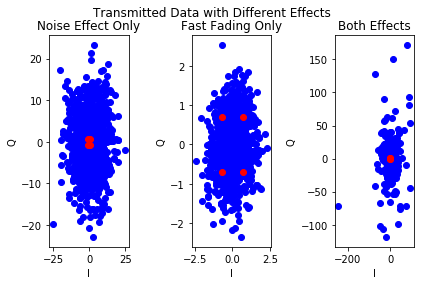

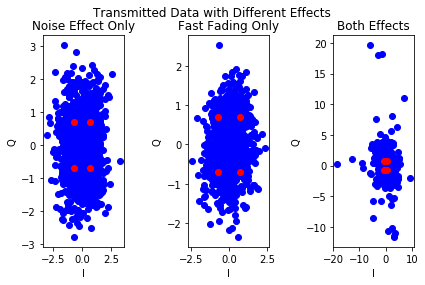

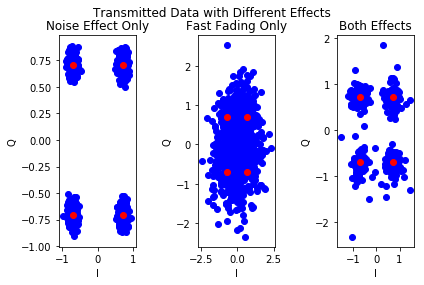

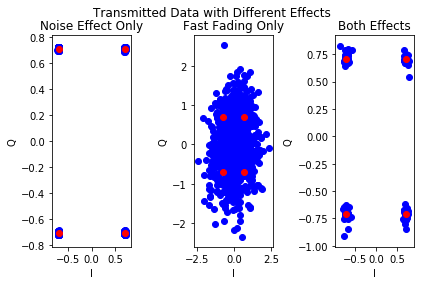

In [69]:
dataStream = generateDataStream(1000, 2)
encodedData = PAMMapping(dataStream, QPSKDictionary)
ffData, channelEffect = fastFading(encodedData, np.sqrt(2))

for SNR in [0.1, 1, 10, 100] :
    receivedData = AWGN(ffData, 1 / SNR, np.sqrt(2))
    scatterPlot(list(QPSKDictionary.values()), AWGN(encodedData, 1 / SNR, np.sqrt(2)), ffData, np.divide(receivedData, channelEffect))

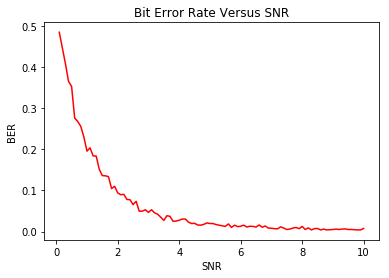

In [70]:
SNRs = np.arange(0.1, 10.1, 0.1)
bitErrorRates = list()

for SNR in SNRs:
    dataStream = generateDataStream(1000, 2)
    encodedData = PAMMapping(dataStream, QPSKDictionary)
    ffData, channelEffect = fastFading(encodedData, np.sqrt(2))
    receivedData = AWGN(ffData, 1 / SNR, np.sqrt(2))
    decodedData = PAMDemapping(np.divide(receivedData, channelEffect), QPSKDictionary)
    bitErrorRates.append(findBitErrorRate(dataStream, decodedData))

plotErrorRateVersusSNR(bitErrorRates, SNRs)

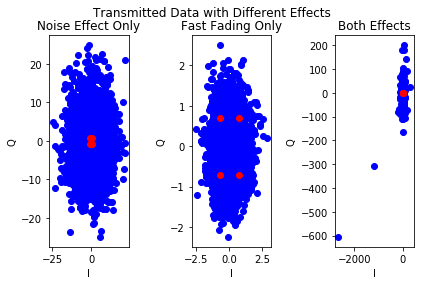

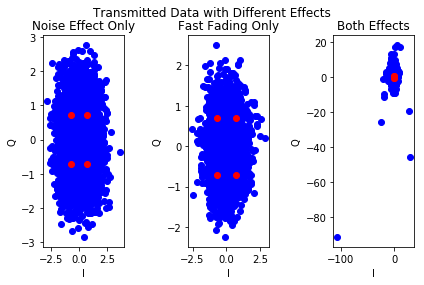

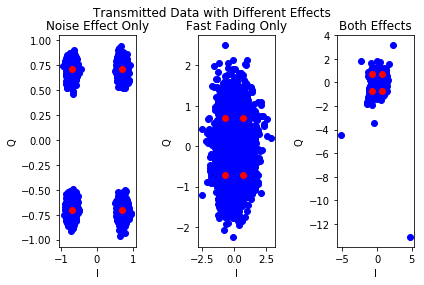

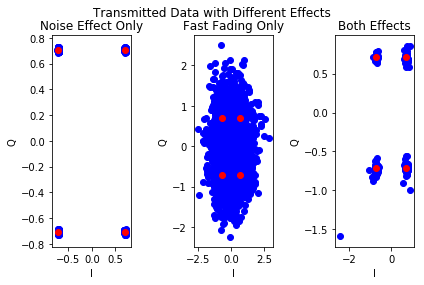

In [71]:
def hammingParity(data) :
    p1 = str(data[0] ^ data[1] ^ data[3])
    p2 = str(data[0] ^ data[2] ^ data[3])
    p3 = str(data[1] ^ data[2] ^ data[3])
    return p1 + p2 + p3

def hammingCode(dataStream) :
    hammingData = list()
    codedData = ""
    for data in dataStream :
        codedData += data + hammingParity([int(x) for x in data])
    
    for i in range(0, len(codedData) - 1, 2) :
        hammingData.append(codedData[i:i+2])
    
    return np.array(hammingData)

def errorCorrection(data) :
    e1 = str(data[0] ^ data[1] ^ data[3] ^ data[4])
    e2 = str(data[0] ^ data[2] ^ data[3] ^ data[5])
    e3 = str(data[1] ^ data[2] ^ data[3] ^ data[6])
    
    error = e1 + e2 + e3
    
    if error == "111" :
        return str(data[0]) + str(data[1]) + str(data[2]) + str(1 - data[3])
    if error == "110" :
        return str(1 - data[0]) + str(data[1]) + str(data[2]) + str(data[3])
    if error == "101" :
        return str(data[0]) + str(1 - data[1]) + str(data[2]) + str(data[3])
    if error == "011" :
        return str(data[0]) + str(data[1]) + str(1 - data[2]) + str(data[3])
    
    return str(data[0]) + str(data[1]) + str(data[2]) + str(data[3])

def hammingDecoding(dataStream) :
    codedData = ""
    encodedData = list()
    for data in dataStream :
        codedData += data
    
    for i in range(0, len(codedData) - 6, 7) :
        encodedData.append(errorCorrection([int(x) for x in codedData[i:i+7]]))
    
    return np.array(encodedData)

dataStream = generateDataStream(800, 4)
hammingData = hammingCode(dataStream)
encodedData = PAMMapping(hammingData, QPSKDictionary)
ffData, channelEffect = fastFading(encodedData, np.sqrt(2))

for SNR in [0.1, 1, 10, 100] :
    receivedData = AWGN(ffData, 1 / SNR, np.sqrt(2))
    scatterPlot(list(QPSKDictionary.values()), AWGN(encodedData, 1 / SNR, np.sqrt(2)), ffData, np.divide(receivedData, channelEffect))
    

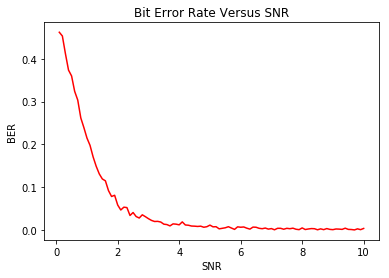

In [72]:
SNRs = np.arange(0.1, 10.1, 0.1)
bitErrorRates = list()

for SNR in SNRs:
    dataStream = generateDataStream(800, 4)
    hammingData = hammingCode(dataStream)
    encodedData = PAMMapping(hammingData, QPSKDictionary)
    ffData, channelEffect = fastFading(encodedData, np.sqrt(2))
    receivedData = AWGN(ffData, 1 / SNR, np.sqrt(2))
    decodedData = PAMDemapping(np.divide(receivedData, channelEffect), QPSKDictionary)
    decodedHamming = hammingDecoding(decodedData)
    bitErrorRates.append(findBitErrorRate(dataStream, decodedHamming))

plotErrorRateVersusSNR(bitErrorRates, SNRs)

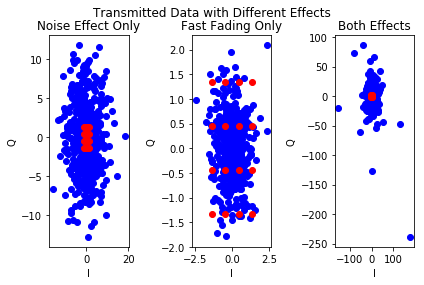

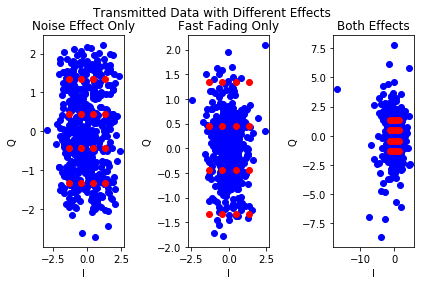

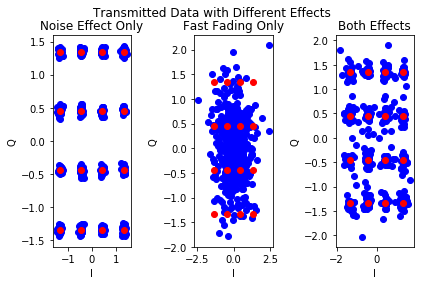

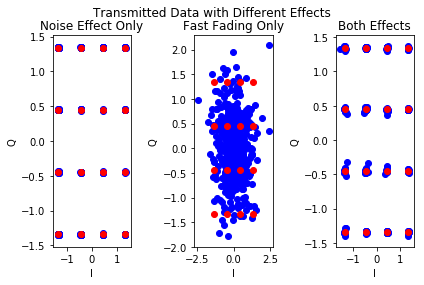

In [73]:
dataStream = generateDataStream(500, 4)
encodedData = PAMMapping(dataStream, QAMDictionary)
ffData, channelEffect = fastFading(encodedData, np.sqrt(5))

for SNR in [0.1, 1, 10, 100] :
    receivedData = AWGN(ffData, 1 / SNR, np.sqrt(5))
    scatterPlot(list(QAMDictionary.values()), AWGN(encodedData, 1 / SNR, np.sqrt(5)), ffData, np.divide(receivedData, channelEffect))

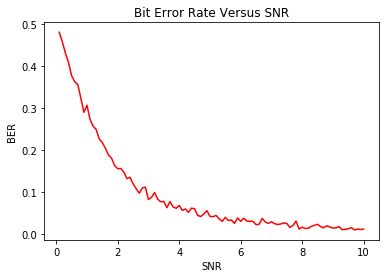

In [74]:
SNRs = np.arange(0.1, 10.1, 0.1)
bitErrorRates = list()

for SNR in SNRs:
    dataStream = generateDataStream(500, 4)
    encodedData = PAMMapping(dataStream, QAMDictionary)
    ffData, channelEffect = fastFading(encodedData, np.sqrt(5))
    receivedData = AWGN(ffData, 1 / SNR, np.sqrt(5))
    decodedData = PAMDemapping(np.divide(receivedData, channelEffect), QAMDictionary)
    bitErrorRates.append(findBitErrorRate(dataStream, decodedData))

plotErrorRateVersusSNR(bitErrorRates, SNRs)